In [1]:
# Importing Library
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Data Collection**

In [2]:
data=pd.read_csv("wine_quality.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#Checking the shape of the data.
data.shape

(1599, 12)

In [4]:
#Checking the null value present if any
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#Checking the mean , standard mean,1st quantile,2nd quantile, 3rd quantile and , max in data description.
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
#Unique value in each of the feature columns
for column in data.columns:
    unique_values = data[column].nunique()
    print(f'Unique values in column "{column}":')
    print(unique_values)
    print('---------------------')

Unique values in column "fixed acidity":
96
---------------------
Unique values in column "volatile acidity":
143
---------------------
Unique values in column "citric acid":
80
---------------------
Unique values in column "residual sugar":
91
---------------------
Unique values in column "chlorides":
153
---------------------
Unique values in column "free sulfur dioxide":
60
---------------------
Unique values in column "total sulfur dioxide":
144
---------------------
Unique values in column "density":
436
---------------------
Unique values in column "pH":
89
---------------------
Unique values in column "sulphates":
96
---------------------
Unique values in column "alcohol":
65
---------------------
Unique values in column "quality":
6
---------------------


denisty > chlorides > Total Sulphur dioxides > Volatile acidity 

**Data Visualization**

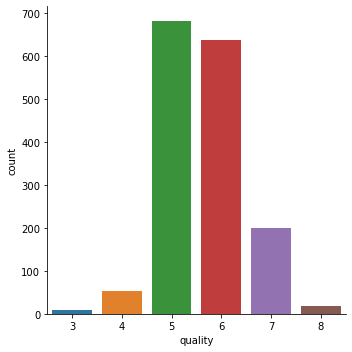

In [8]:
#Checking the values present in Quality column
sns.catplot(x='quality',data=data,kind='count')

* Quality has a high number of values in categories 5,6 and 7.
* only few observations are there in category 3 and 8

In [9]:
target=data.columns[:-1]

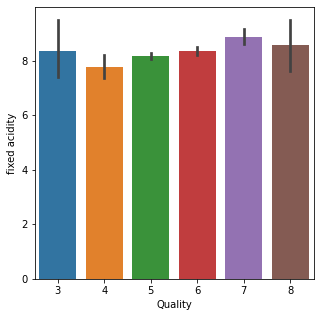

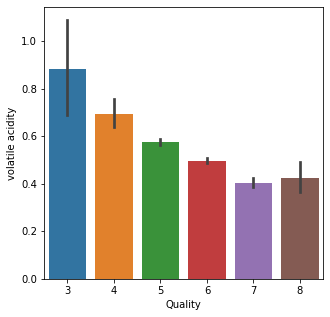

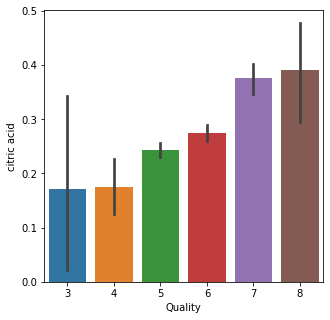

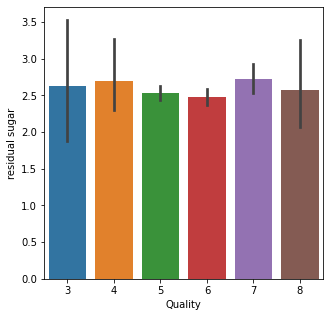

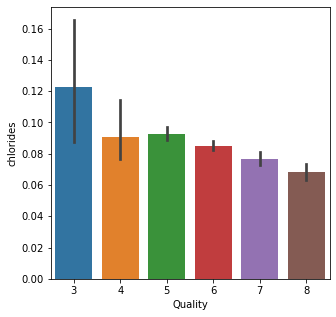

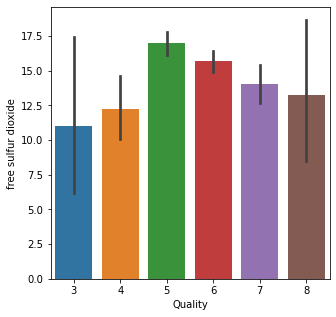

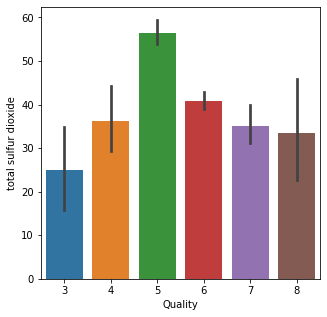

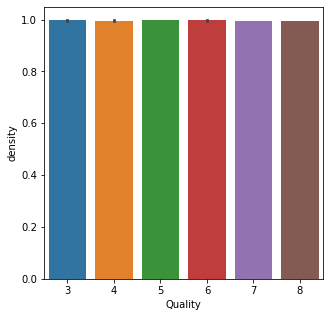

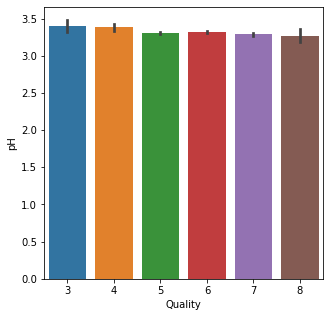

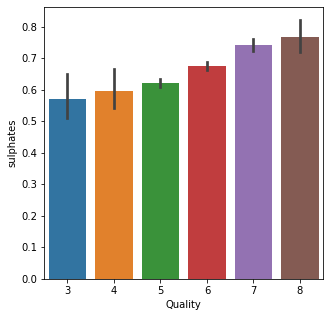

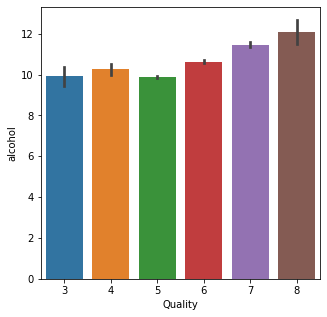

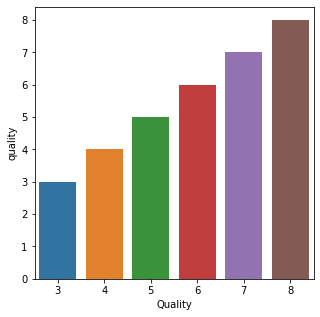

In [10]:
for column in data:
    plt.figure(figsize=[5,5])
    sns.barplot(x='quality',y=column,data=data)
    plt.xlabel('Quality')
    plt.ylabel(column)

* higher the fixed acidity  higher the quality of wine.
* volatile acidity increases quality decreases they are inversly proportional to each other.
* lower the citric acid  lower the  quality of wine it is directly propotional to quality of wine. 
* residual sugar increase the quality of wine is also increased
* Chlorides are also inversly proportional to quality
*  free sulfur dioxide increases the quality
* density increase directly proportional to quality.
* high ph values reduces the quality of wine.
* sulphates are directly propotional to quality.
* alcohol is directly proportional to quality

<AxesSubplot:>

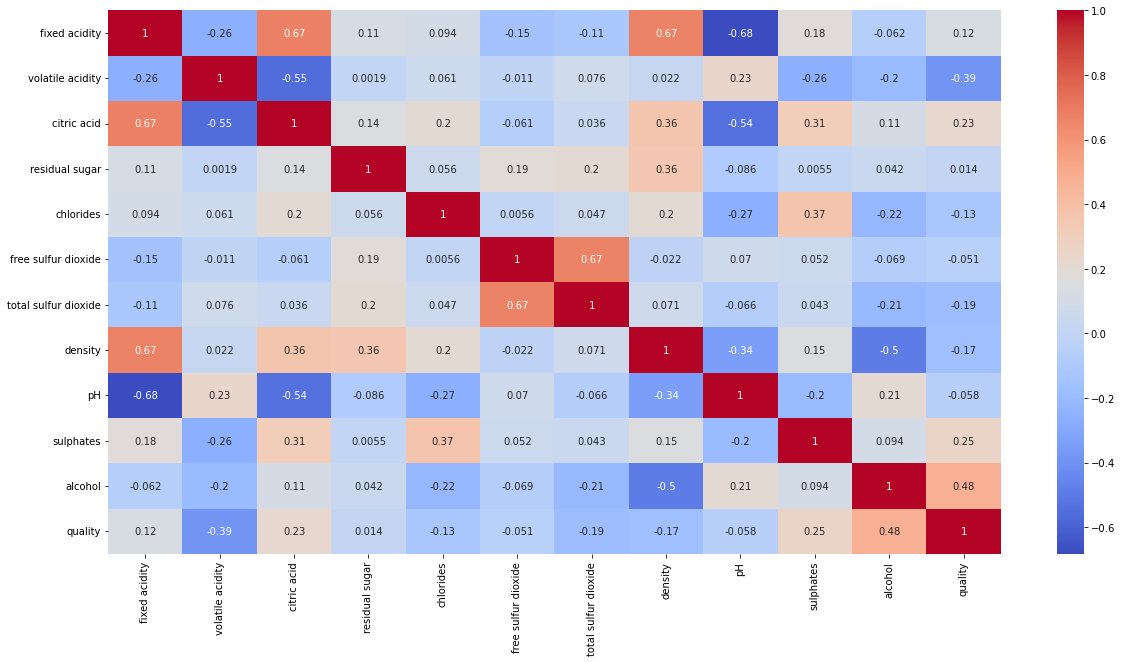

In [11]:
#plotting heatmap to check the correlation between the the target features and other feature columns
plt.figure(figsize=[20,10])
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

alcohol is correlation with the target variable.

## Data Preprocessing

In [12]:
X=data.drop(columns=['quality'],axis=1)

**Label Binarization**

In [13]:
y = data['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

**Training and Testing**

In [14]:
#Train test and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=2)


In [15]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [16]:
y_pred=model.predict(X_test)

In [17]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [18]:
model.score(X_test,y_pred)

1.0

In [19]:
def metric_score(model,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=model.predict(x_train)
        
        print("\n======================Train Result================================")
        
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%")
    
    elif train==False:
            pred = model.predict(x_test)
            print("\n=====================Test Result==========================")
            print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
            print('\n \n Test Classification Report \n',classification_report(y_test,pred,digits=2))

In [20]:
#Checking the metrics score.
metric_score(model,X_train,X_test,y_train,y_test,train=True)
metric_score(model,X_train,X_test,y_train,y_test,train=False)


======================Train Result================================
Accuracy Score:100.00%

=====================Test Result==========================
Accuracy Score:90.21%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       414
           1       0.71      0.48      0.58        66

    accuracy                           0.90       480
   macro avg       0.82      0.73      0.76       480
weighted avg       0.89      0.90      0.89       480



**Hyperparameter Tuning**

In [21]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [22]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

In [23]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [24]:
best_param=grid_search.best_params_

In [25]:
print(best_param)

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [26]:
model=RandomForestClassifier(n_estimators=101,min_samples_split=3,max_depth=12,min_samples_leaf=2)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=101)

In [27]:
metric_score(model,X_train,X_test,y_train,y_test,train=True)
metric_score(model,X_train,X_test,y_train,y_test,train=False)


======================Train Result================================
Accuracy Score:98.66%

=====================Test Result==========================
Accuracy Score:89.79%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       414
           1       0.72      0.42      0.53        66

    accuracy                           0.90       480
   macro avg       0.82      0.70      0.74       480
weighted avg       0.89      0.90      0.89       480



**Evaluating Model Performance**

In [40]:
import numpy as np
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error
accuracy = accuracy_score(y_test, y_pred)
mean_absolute_error = mean_absolute_error(y_test, y_pred)
mean_squared_error = mean_squared_error(y_test, y_pred)
root_mean_squared_error = np.sqrt(mean_squared_error)

# Evaluation metrics
print("Accuracy Score: {:.2f}".format(accuracy))
print("Mean Absolute Error: {:.2f}".format(mean_absolute_error))
print("Mean Squared Error: {:.2f}".format(mean_squared_error))
print("Root Mean Squared Error: {:.2f}".format(root_mean_squared_error))

Accuracy Score: 0.90
Mean Absolute Error: 0.10
Mean Squared Error: 0.10
Root Mean Squared Error: 0.31


In [48]:
# Making Predictions.
X_new = pd.DataFrame([[7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8]], columns=X.columns)
predictions = model.predict(X_new)
print("Predictions:", predictions)

Predictions: [0]
